In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./ecommerce.csv")

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
# EDA
X_col_names = df.columns[3:7]
y_col_name = df.columns[7]

for X_col_name in X_col_names:
  sns.jointplot(x=X_col_name, y=y_col_name, data=df, alpha=0.5)

In [ ]:
sns.pairplot(df, kind="scatter", plot_kws={ "alpha":0.4 })

In [ ]:
sns.lmplot(x = X_col_names[-1],
           y = y_col_name,
           data = df,
           scatter_kws={ "alpha":0.4 })

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X = df[X_col_names]
y = df[y_col_name]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [37]:
# Training the model

In [39]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
list(zip(X_col_names, lm.coef_))

[('Avg. Session Length', 25.724256205587025),
 ('Time on App', 38.597135477079036),
 ('Time on Website', 0.4591478763389816),
 ('Length of Membership', 61.67473243026731)]

In [50]:
predictions = lm.predict(X_test)
predictions[:10 ]

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105])

In [ ]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [58]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", mean_squared_error(y_test, predictions, squared=False))

Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
RMSE:  10.193897260863155


In [59]:
# Residules
# If residuals are not random then your model is biased

In [62]:
residuals = y_test - predictions
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

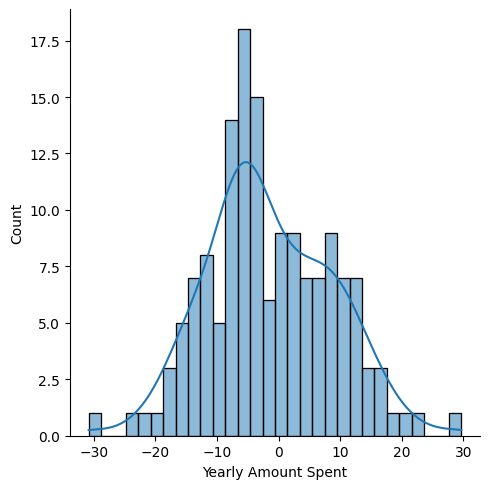

In [66]:
sns.displot(residuals, bins=30, kde=True)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

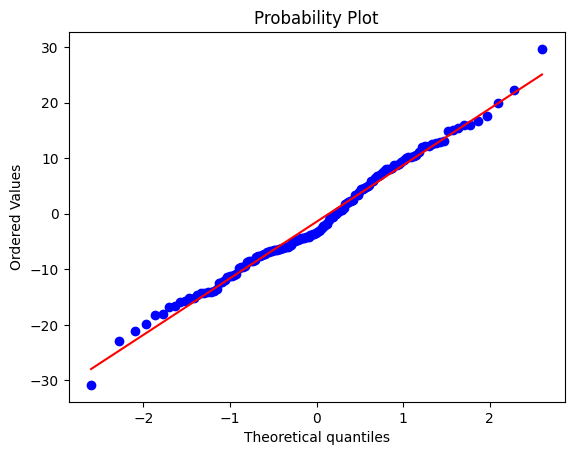

In [69]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)